# **Lab2.2 : Image Enhancement with Statistical Operation** 

In this lab, you will execute two techniques: Image Histogram Equalization and Histogram Matching. Additionally, you will explore the pixel values of the image through a histogram.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import ImageGrid

## **Histogram Equalization**
Read an image using OpenCV (Use your own image).

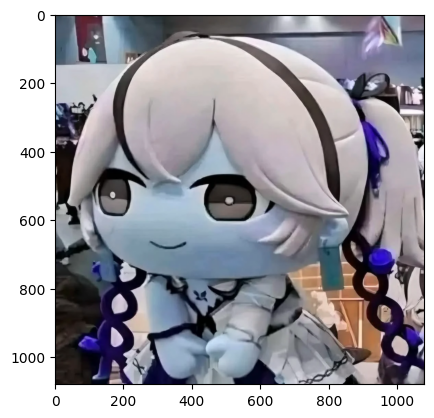

In [2]:
### START CODE HERE ###
img = cv2.imread("assets/Camellya.webp")


plt.imshow(img)
### END CODE HERE ###

Complete the `plot_histogram()` function below. This function returns the histogram of an image's pixel values, using `cv2.calcHist()`.

In [3]:
### START CODE HERE ###
def plot_histogram(image):
    if len(image.shape) == 2:
        hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    else:
        hist = []
        for i in range(image.shape[2]):
            h = cv2.calcHist([image], [i], None, [256], [0, 256])
            hist.append(h)
    return hist
### END CODE HERE ###

Display the output like the reference image below using subplot, where the first plot is the image and the second plot is the histogram of each channel.

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image-2.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/main/Lab2_Image-Enhancement/assets/2-1.png?raw=true)
</details>

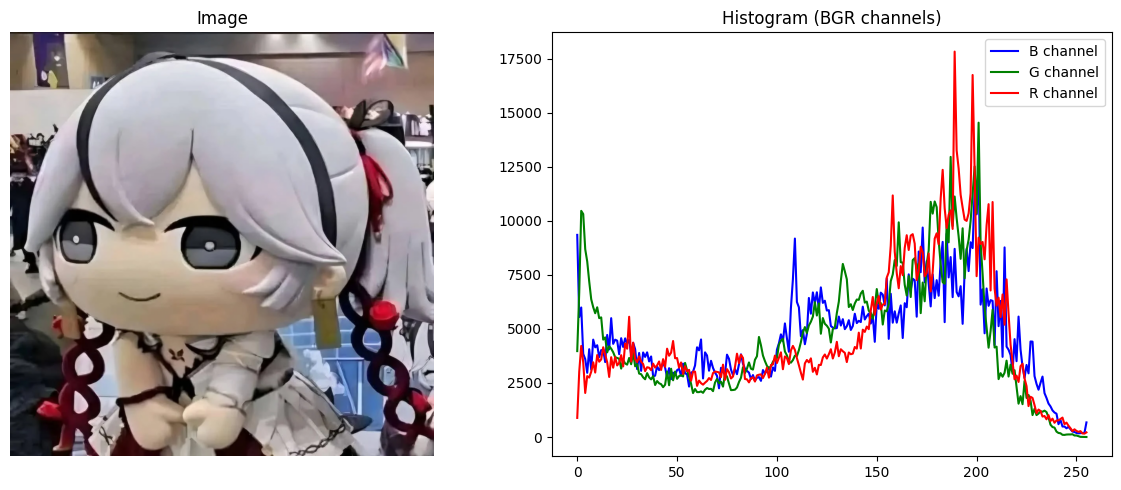

In [4]:
### START CODE HERE ###
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
hist = plot_histogram(img)

plt.figure(figsize=(12, 5))

# Show the image
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title("Image")
plt.axis('off')

# Show the histogram
plt.subplot(1, 2, 2)
if isinstance(hist, list):
    colors = ['b', 'g', 'r']
    for i, h in enumerate(hist):
        plt.plot(h, color=colors[i], label=f'{colors[i].upper()} channel')
    plt.title("Histogram (BGR channels)")
    plt.legend()
else:
    plt.plot(hist, color='k')
    plt.title("Histogram (Grayscale)")

plt.tight_layout()
plt.show()












### END CODE HERE ###

Now let's equalize the histogram of all channel using `cv2.equalizeHistogram()`<br/>
Display the output like the reference image below using subplot, where the first plot is the image and the second plot is the histogram of each channel that that has been equalized.

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/main/Lab2_Image-Enhancement/assets/2-2.png?raw=true)
</details>

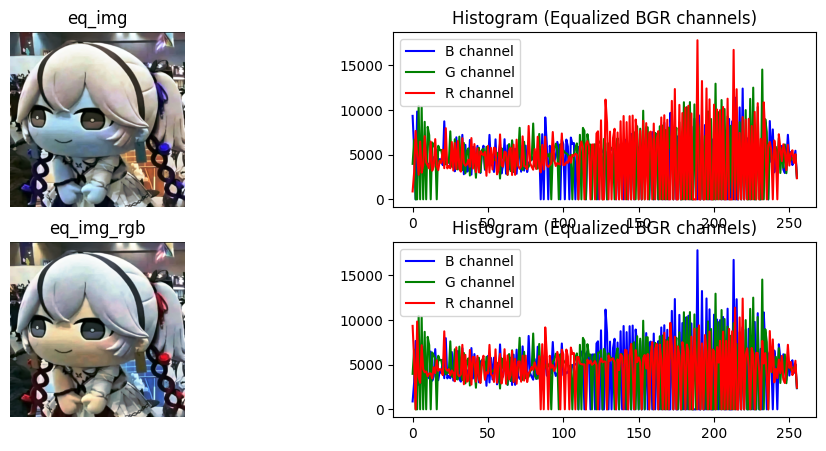

In [5]:
### START CODE HERE ###
 
img = cv2.imread("assets/Camellya.webp")

b, g, r = cv2.split(img)

eq_b = cv2.equalizeHist(b)
eq_g = cv2.equalizeHist(g)
eq_r = cv2.equalizeHist(r)

eq_img = cv2.merge([eq_b, eq_g, eq_r])
eq_img_rgb = cv2.cvtColor(eq_img, cv2.COLOR_BGR2RGB)


plt.figure(figsize=(12, 5))

plt.subplot(2, 2, 1)
plt.imshow(eq_img)
plt.title("eq_img")
plt.axis('off')

plt.subplot(2, 2, 2)
colors = ['b', 'g', 'r']
hist = plot_histogram(eq_img)

for i, color in enumerate(colors):
    hist = cv2.calcHist([eq_img], [i], None, [256], [0, 256])
    plt.plot(hist, color=color, label=f'{color.upper()} channel')
plt.title("Histogram (Equalized BGR channels)")
plt.legend()

plt.subplot(2, 2, 3)
plt.imshow(eq_img_rgb)
plt.title("eq_img_rgb")
plt.axis('off')

plt.subplot(2, 2, 4)
colors = ['b', 'g', 'r']
hist = plot_histogram(eq_img_rgb)

for i, color in enumerate(colors):
    hist = cv2.calcHist([eq_img_rgb], [i], None, [256], [0, 256])
    plt.plot(hist, color=color, label=f'{color.upper()} channel')
plt.title("Histogram (Equalized BGR channels)")
plt.legend()

plt.show()


# if isinstance(hist, list):
#     colors = ['b', 'g', 'r']
#     for i, h in enumerate(hist):
#         plt.plot(h, color=colors[i], label=f'{colors[i].upper()} channel')
#     plt.title("Histogram (BGR channels)")
#     plt.legend()
# else:
#     plt.plot(hist, color='k')
#     plt.title("Histogram (Grayscale)")




 
### END CODE HERE ###

## **Image Histogram Matching**
Read 2 images using OpenCV. Use your own images. One image will be the input image and the other will be the template image.

In [6]:
### START CODE HERE ###


img1 = cv2.imread("assets/Camellya.webp")
img2 = cv2.imread("assets/PhibiChupi.webp")


### END CODE HERE ###

Let's explore 2 images. Use suplot to plot :
- An image
- PDF(Probability Density Function) of each channel
- CDF(Cumulative Distribution Function) of each channel 

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/main/Lab2_Image-Enhancement/assets/2-3.png?raw=true)
</details>

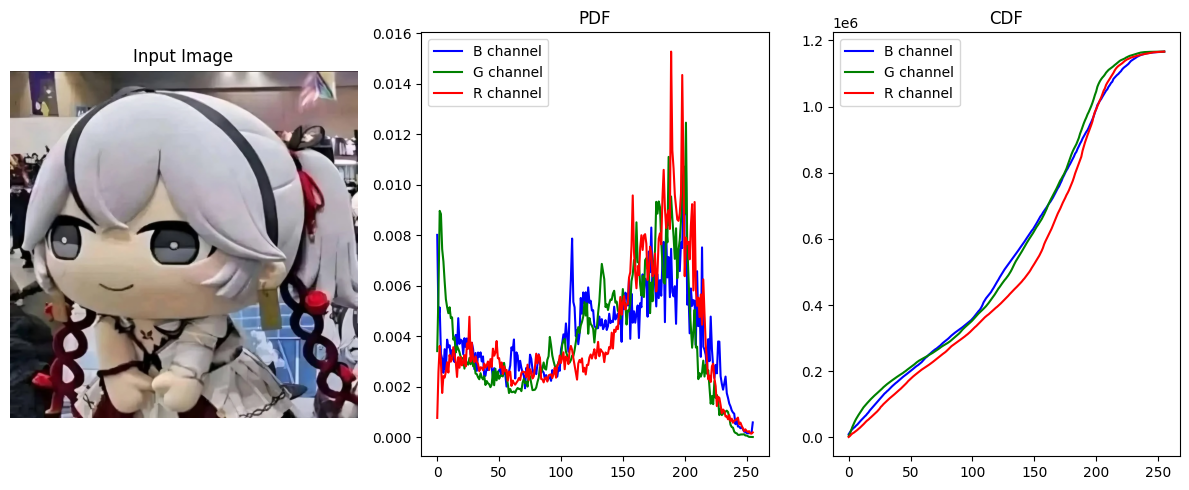

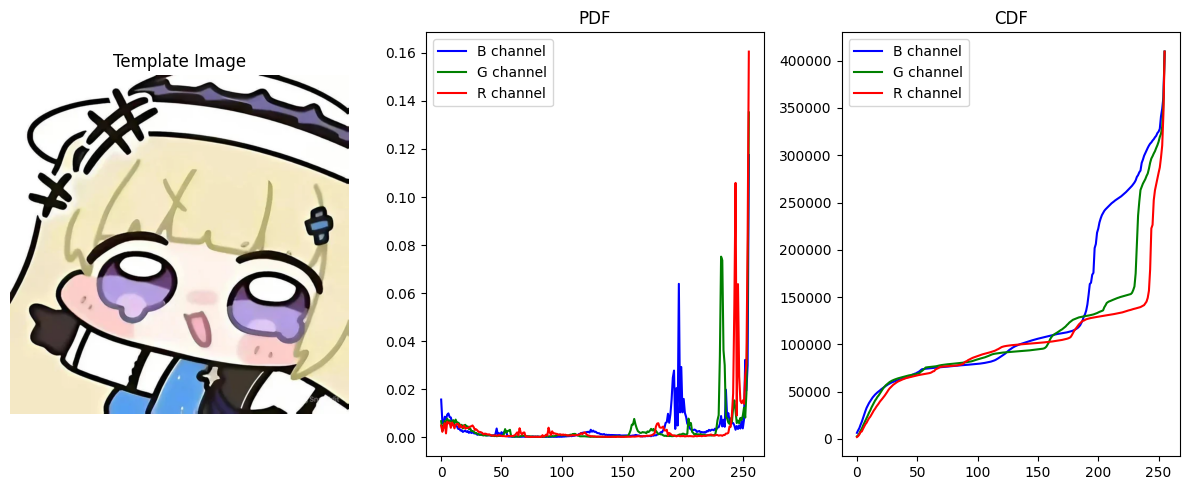

In [7]:
### START CODE HERE ###

def plot_pdf_cdf(img, title="Image"):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    colors = ['b', 'g', 'r']
    plt.figure(figsize=(12, 5))

    #show img
    plt.subplot(1, 3, 1)
    plt.imshow(img_rgb)
    plt.title(title)
    plt.axis('off')

    #show_pdf
    plt.subplot(1, 3, 2)
    for i, color in enumerate(colors):
        hist = cv2.calcHist([img], [i], None, [256], [0, 256])
        pdf = hist / hist.sum()
        plt.plot(pdf, color=color, label=f'{color.upper()} channel')
    plt.title("PDF")
    plt.legend()

    #show_cdf
    plt.subplot(1, 3, 3)
    for i, color in enumerate(colors):
        hist = cv2.calcHist([img], [i], None, [256], [0, 256])
        cdf = hist.cumsum()
        plt.plot(cdf, color=color, label=f'{color.upper()} channel')
    plt.title("CDF")
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_pdf_cdf(img1, title = "Input Image")
plot_pdf_cdf(img2, title = "Template Image")

















### END CODE HERE ###

Perform Histogram matching in the cell below.
Show the result like the reference image below.

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/main/Lab2_Image-Enhancement/assets/2-4.png?raw=true)
</details>

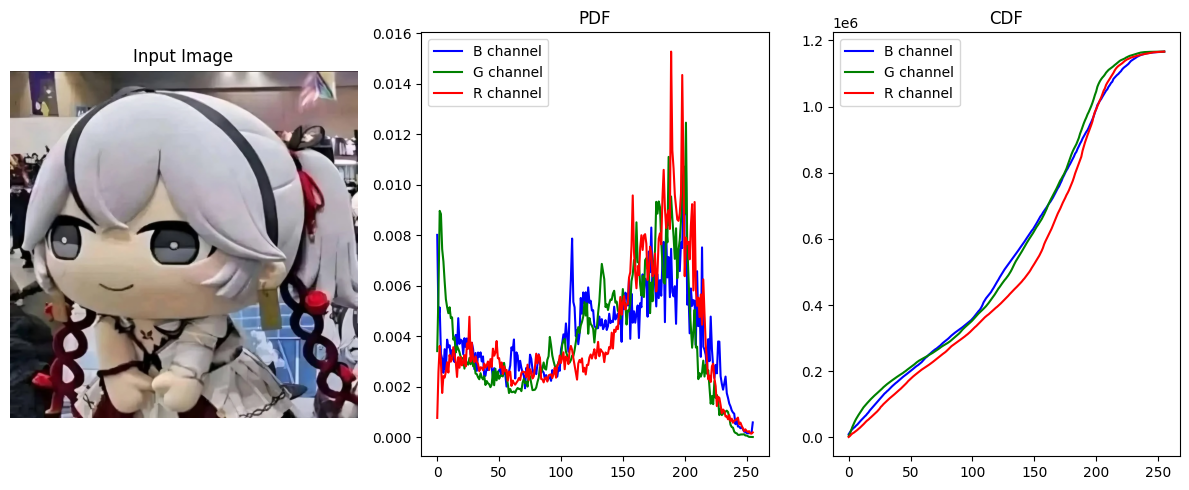

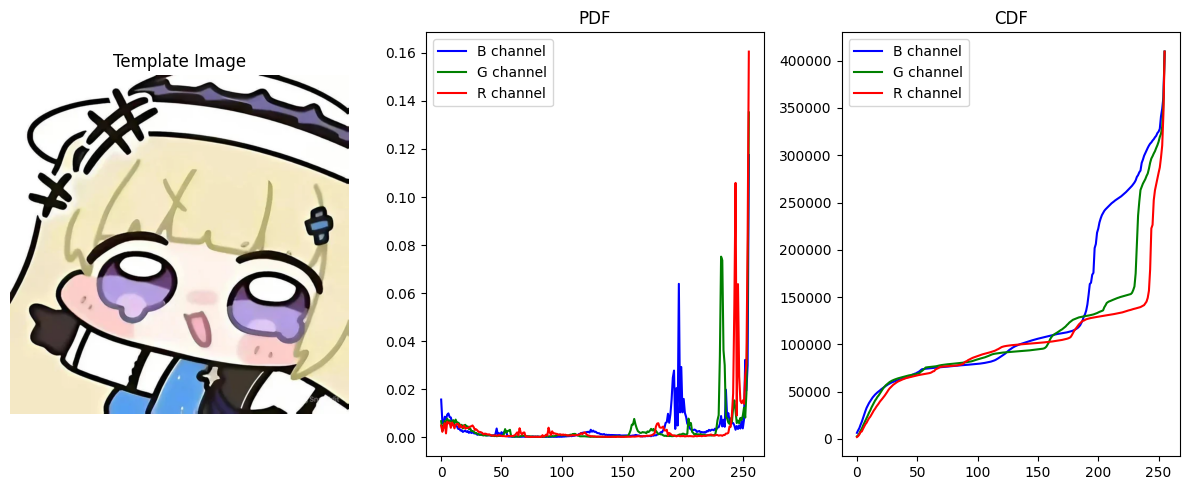

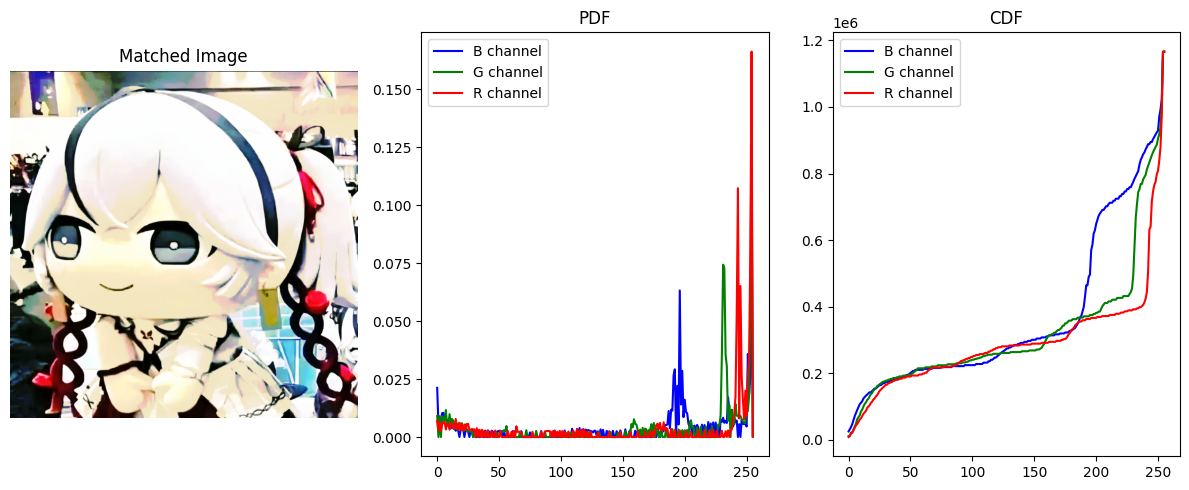

In [8]:
### START CODE HERE ###

def matching_histogram(input, temp):

    # #Input image histogram equalization
    # b, g, r = cv2.split(input)
    # eq_b = cv2.equalizeHist(b)
    # eq_g = cv2.equalizeHist(g)
    # eq_r = cv2.equalizeHist(r)
    # eq_img = cv2.merge([eq_b, eq_g, eq_r])

    # #Template image histogram equalization
    # temp_b, temp_g, temp_r = cv2.split(temp)
    # temp_eq_b = cv2.equalizeHist(temp_b)
    # temp_eq_g = cv2.equalizeHist(temp_g)
    # temp_eq_r = cv2.equalizeHist(temp_r)
    # temp_eq_img = cv2.merge([temp_eq_b, temp_eq_g, temp_eq_r])

    #matching histogram
    matched_img = np.zeros_like(input)
    for i in range(3):
        input_hist, _ = np.histogram(input[:, :, i], bins=256, range=(0, 256))
        temp_hist, _ = np.histogram(temp[:, :, i], bins=256, range=(0, 256))
        cdf_input = input_hist.cumsum()
        cdf_temp = temp_hist.cumsum()
        cdf_input_normalized = cdf_input / cdf_input[-1]
        cdf_temp_normalized = cdf_temp / cdf_temp[-1]
        mapping = np.interp(cdf_input_normalized, cdf_temp_normalized, np.arange(256))
        matched_img[:, :, i] = np.interp(input[:, :, i], np.arange(256), mapping).astype(np.uint8)

    return matched_img

def plot_pdf_cdf(img, title="Image"):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    colors = ['b', 'g', 'r']
    plt.figure(figsize=(12, 5))

    #show img
    plt.subplot(1, 3, 1)
    plt.imshow(img_rgb)
    plt.title(title)
    plt.axis('off')

    #show_pdf
    plt.subplot(1, 3, 2)
    for i, color in enumerate(colors):
        hist = cv2.calcHist([img], [i], None, [256], [0, 256])
        pdf = hist / hist.sum()
        plt.plot(pdf, color=color, label=f'{color.upper()} channel')
    plt.title("PDF")
    plt.legend()

    #show_cdf
    plt.subplot(1, 3, 3)
    for i, color in enumerate(colors):
        hist = cv2.calcHist([img], [i], None, [256], [0, 256])
        cdf = hist.cumsum()
        plt.plot(cdf, color=color, label=f'{color.upper()} channel')
    plt.title("CDF")
    plt.legend()

    plt.tight_layout()
    plt.show()

def plot_matching_histogram(img1, img2):
    matched_img = matching_histogram(img1, img2)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(matched_img, cv2.COLOR_BGR2RGB))
    plt.title("Matched Image")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    colors = ['b', 'g', 'r']
    for i, color in enumerate(colors):
        hist = cv2.calcHist([matched_img], [i], None, [256], [0, 256])
        pdf = hist / hist.sum()
        plt.plot(pdf, color=color, label=f'{color.upper()} channel')
    plt.title("PDF")
    plt.legend()

    plt.subplot(1, 3, 3)
    for i, color in enumerate(colors):
        hist = cv2.calcHist([matched_img], [i], None, [256], [0, 256])
        cdf = hist.cumsum()
        plt.plot(cdf, color=color, label=f'{color.upper()} channel')
    plt.title("CDF")
    plt.legend()

    plt.tight_layout()
    plt.show()

img1 = cv2.imread("assets/Camellya.webp")
img2 = cv2.imread("assets/PhibiChupi.webp")

plot_pdf_cdf(img1, title = "Input Image")
plot_pdf_cdf(img2, title = "Template Image")
plot_matching_histogram(img1, img2)



# img = cv2.imread("assets/Camellya.webp")

# b, g, r = cv2.split(img)

# eq_b = cv2.equalizeHist(b)
# eq_g = cv2.equalizeHist(g)
# eq_r = cv2.equalizeHist(r)

# eq_img = cv2.merge([eq_b, eq_g, eq_r])
# eq_img_rgb = cv2.cvtColor(eq_img, cv2.COLOR_BGR2RGB)


# plt.figure(figsize=(12, 5))

# plt.subplot(2, 2, 1)
# plt.imshow(eq_img)
# plt.title("eq_img")
# plt.axis('off')

# plt.subplot(2, 2, 2)
# colors = ['b', 'g', 'r']
# hist = plot_histogram(eq_img)

# for i, color in enumerate(colors):
#     hist = cv2.calcHist([eq_img], [i], None, [256], [0, 256])
#     plt.plot(hist, color=color, label=f'{color.upper()} channel')
# plt.title("Histogram (Equalized BGR channels)")
# plt.legend()

# plt.subplot(2, 2, 3)
# plt.imshow(eq_img_rgb)
# plt.title("eq_img_rgb")
# plt.axis('off')

# plt.subplot(2, 2, 4)
# colors = ['b', 'g', 'r']
# hist = plot_histogram(eq_img_rgb)

# for i, color in enumerate(colors):
#     hist = cv2.calcHist([eq_img_rgb], [i], None, [256], [0, 256])
#     plt.plot(hist, color=color, label=f'{color.upper()} channel')
# plt.title("Histogram (Equalized BGR channels)")
# plt.legend()

# plt.show()



### END CODE HERE ###

---

## **Questions**
1. If an image having a dense histogram concentrated at high intensity, how would an image appear when you display on a device.
2. If we want to enhance the image explained in question 1 using histogram matching, how would the histogram of the template image should be?
3. How would we enhance an image having too bright in some area and too dark in another area?

1.รูปจะออกมาค่าสีที่สว่างมากทำให้ภาพมีดีเทลน้อยลงเพราะว่าสีสว่างมากเกินไป

2. ใช้ Template ที่มีค่า histogram อยู่ใช่ช่วงที่ต่ำกว่าที่ต้องการเปลี่ยน 

3.ใ̶ช̶̶้ว̶ิ̶ธ̶ี̶ ̶H̶i̶s̶t̶o̶g̶r̶a̶m̶ ̶E̶q̶u̶a̶l̶i̶z̶a̶t̶i̶o̶n̶ ̶เ̶พ̶ื̶̶่อ̶ท̶ำ̶ใ̶ห̶̶้ค̶̶่า̶ค̶ว̶า̶ม̶ส̶ว̶̶่า̶ง̶ข̶อ̶ง̶ภ̶า̶พ̶ก̶ร̶ะ̶จ̶า̶ย̶ท̶ั̶̶่ว̶ภ̶า̶พ̶ม̶า̶ก̶ข̶ึ̶̶้น̶
  ใช้วิธี Histogram Matching โดยใช้ Template ที่มีค่า Histogram สมดุล ไม่สว่าง หรือ มืดเกินไป